<b>Question 1A</b>

First let's import some modules that we will need to analyze the data. We will also store the dataset in our local directory. 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import the data from the local disk
book = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx', sheet_name="Sheet1", engine='openpyxl')

First, let's obtain some simple statistical metrics regarding our dataset.

In [13]:
book.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The count of each columns of our dataset is 5000, which tells us that there is no missing data in our dataset. We can also see that the incorrect AOV of 3145.12\\$ was retrieved from the mean of the order_amount. 

For the minimum of each columns, specifically the <b>order_amount</b> and <b>total_items</b>, the data seems correct. For the maximums, the data shows that the maximum order totaled a value of 704 000\\$ with 2000 items bought, which seems to represent an anomaly given that a store generally do not sell that many shoes on a single order, especially if there are other orders with similar quantities.

Another observation is the huge standard deviation in <b>order_amount</b> and <b>total_items</b>, which seems to tell that the data is very dispersed. 

Let's first visualize the first 20 sample points of our given data to see what we get.

In [4]:
book.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
5,6,58,882,138,1,credit_card,2017-03-14 15:25:00.986
6,7,87,915,149,1,cash,2017-03-01 21:37:57.465
7,8,22,761,292,2,cash,2017-03-08 02:05:37.981
8,9,64,914,266,2,debit,2017-03-17 20:56:50.468
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26.343


Most of the orders are coherent and with each other, and is what you would expect from a shoe order. However, we can detect that the order with <b>"order_id: 15"</b> is a very large order, with <b>order_amount</b> and <b>total_items</b> similar to the maximums. Let's see if there are other orders that are similar to this one. 

In [18]:
book = book.sort_values(by="total_items", ascending=False)
book.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00.000
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00.000
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00.000
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000


From the above data, there are a few conclusions that we can come up with: <br/>

&emsp;&emsp;1. There are multiple orders that have the same <b>order_amount</b> of 704 000\\$ with 2000 shoes bought. <br/>
&emsp;&emsp;2. All the orders with these large values come from the same store with <b>"shop_id: 42"</b>. <br/>
&emsp;&emsp;3. All the orders with these large values come from the same user with <b>"user_id: 607"</b>. <br/>
&emsp;&emsp;4. All the orders with these large values were paid by credit card and processed at the same clock time of "04:00:00:000". This is very abnormal and generally means that a bot/software is processing these orders and not an actual user. <br/>

Given that there are a lot of orders coming from the same shop with 2000 shoes bought on each order, it seems that there is in fact an error in the dataset. First, let's visualize the data by filtering the <b>"shop_id: 42"</b> to see if there is a defining pattern.


In [19]:
shop_42 = book[book.shop_id == 42]
shop_42

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00.000
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00.000
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00.000
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000


From the data above, the shop does also have orders that come from other users that have different payment methods and <b>created_at</b> times, meaning that the shop itself is not generating a clear pattern.

Let's now visualize the data by filtering the <b>"user_id: 607"</b>. We will also sort the data in an increasing order of <b>"created_at"</b> time.

In [23]:
user_607 = book[book.user_id == 607]
user_607 = user_607.sort_values(by="created_at", ascending=True)
user_607

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00


In conclusion, we can say that all orders with these large <b>"order_amount"</b>, <b>"total_items"</b>, and same <b>"create_at"</b> clock time, come from "user_id: 607". We can remove it from the dataset once we have fully analzyzed the data.<br/>

Another metric that would be interesting to add to the dataset would be the shoe price for each store. Let's add it and visualize if the data is logically coherent.

In [28]:
book['shoe_price'] = book.order_amount/book.total_items
book.describe()

,order_id,shop_id,user_id,order_amount,total_items,shoe_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


We can see that the average of a shoe throughout all stores is around 387.74\\$, which is quite reasonable for a shoe store. However, the high standard deviation tells us that the data is very dispersed. Another anomaly to point out is that the maximum shoe price is 25 725\$. Although it is possible for very popular shoes, it seems to drive our data upwards. <br/>

Let's visualize the highest shoe prices. 

In [33]:
book['shoe_price'].unique()

array([25725.,   352.,   201.,   196.,   195.,   193.,   190.,   187.,
         184.,   181.,   178.,   177.,   176.,   173.,   172.,   171.,
         169.,   168.,   166.,   165.,   164.,   163.,   162.,   161.,
         160.,   158.,   156.,   155.,   154.,   153.,   149.,   148.,
         147.,   146.,   145.,   144.,   142.,   140.,   138.,   136.,
         134.,   133.,   132.,   131.,   130.,   129.,   128.,   127.,
         122.,   118.,   117.,   116.,   114.,   112.,   111.,   101.,
          94.,    90.])

Most of the shoe prices are between 100\$ and 200\$, with the anomaly being the highest shoe price 25 725\$. This can be visualized in the plot below.

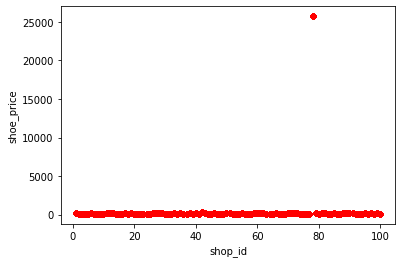

In [46]:
book.plot(kind='scatter', x='shop_id', y='shoe_price', color='red')
plt.show()

Let's now remove the abovementionned anomalies ( <b>user_id: "607"</b> & <b>shoe_price: "25725"</b> ) and recalculate the statistics of the dataset.

In [55]:
book = book[book['user_id'] != 607]
book = book[book['shoe_price'] != 25725]
book.describe()

,order_id,shop_id,user_id,order_amount,total_items,shoe_price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


As we can see, the data is now more coherent with what you would expect. The standard deviations are low, the range of each columns are reasonable, and the means are rational. From this dataset, the new AOV is 302.58\\$.

<b>Question 1B: What metric would you report for this dataset?</b>

For this dataset, I would report the <b>order_id</b>, the <b>order_amount</b>, and the <b>shoe_price</b> for each store. The order_id is important to show uniqueness, and would be the key if ever we need to trace back an order. Speaking of, a detail that I noticed 
was that there were no patterns between the order_id and the create_at time. Although it is a minor detail, I think that there should be a correlation between those two metrics to better structure the data (e.g. increasing order_id in chronological order). 

The order amount would also be important to track how much money a user spends for a specific store, and understand why a certain store does better. Finally, we would report the shoe_price for each store. However, all the metrics are very important to consider in analyzing our dataset and better draw conclusions.

Other interesting metrics that could be added in the dataset are the average AOV per store, and the total items bought of all orders for each store.<br/><br/>


<b>Question 1C: What is that value?</b>

In [58]:
book['order_amount'].median()

284.0

The new average order value is <b>302.58\$</b> and the median is <b>284.00\$</b>, meaning that the data is very clustered and not skewed.